In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive')

Input Image Data using Python

In [ ]:
import cv2
from os import listdir
import os
from PIL import Image as PImage
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
image_num = 1000
factor = 2

# Function to load the images one by one from source location
def loadImages(path,image_num):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    count=0
    for image in imagesList[0:min(len(imagesList),image_num)]:
      img = PImage.open(path +'/'+ image)
      if count == 0:
        print(img.size)
      # Resizing the image by defined factor to control data volume
      img = img.resize((int(img.size[1]/factor), int(img.size[0]/factor)))
      img = np.array(img)
      if count == 0:
        print(img.shape)
      # Flattening the images
      img = img.reshape(img.shape[0]*img.shape[1])
      loadedImages.append(img)
      count = count + 1

    return loadedImages

# Defining image path
path = "/content/drive/MyDrive/Pixxel_Work/110KU_images"

# your images in an array
imgs = loadImages(path, image_num)

(1191, 3441)
(595, 1720)


In [ ]:
sum=0
print(len(imgs[0]))
for i in range(len(imgs[0])):
  sum=sum+imgs[0][i]
print(sum)

1023400
315681


In [ ]:
# Converting list into numpy array
imgs_np = np.array(imgs)

In [ ]:
print(imgs_np.shape)
print(imgs_np)

(242, 1023400)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Performing PCA
from sklearn.decomposition import PCA
variance = .98
pca = PCA(variance)
pca.fit(imgs_np)
print("Number of components after PCA 98% = " + str(pca.n_components_))

# Transforming dataframe as per PCA
pca_data = pca.transform(imgs_np)
print("Dimension of our data after PCA = " + str(pca_data.shape))

Number of components after PCA 98% = 2
Dimension of our data after PCA = (242, 2)


In [ ]:
pca_df = pd.DataFrame(pca_data)
print(pca_df.shape)

(242, 2)


In [ ]:
# Running K means cluster
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_df)
    distortions.append(kmeanModel.inertia_)


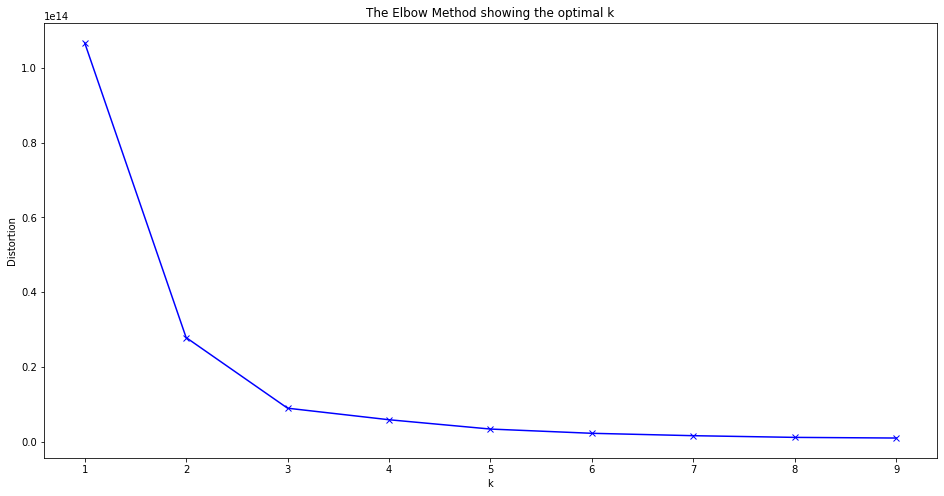

In [ ]:
# Determining k for k means by elbow method
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

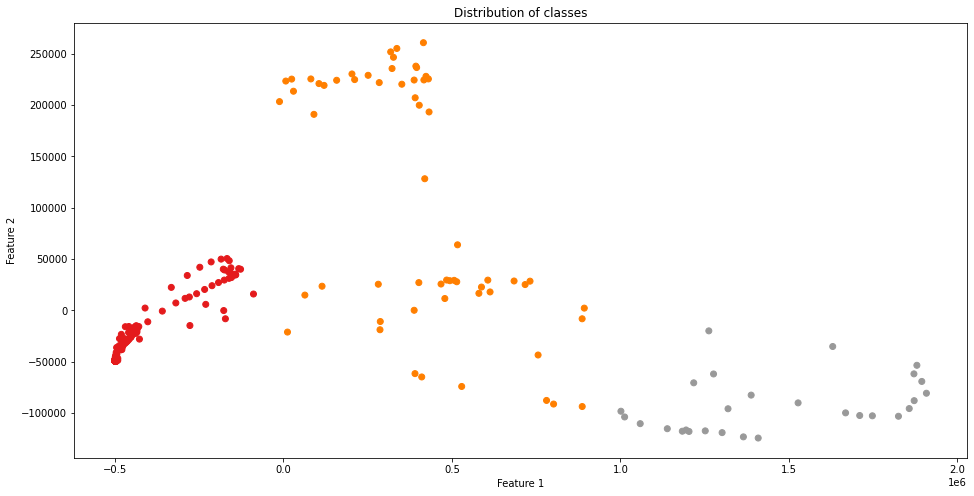

In [ ]:
# Final Clustering
cluster_size = 3
kmeanModel = KMeans(n_clusters=cluster_size)
kmeanModel.fit(pca_df)

# Plot clusters
pca_df['k_means']=kmeanModel.predict(pca_df)
plt.figure(figsize=(16,8))
plt.scatter(pca_df[0], pca_df[1], c=pca_df['k_means'],cmap=plt.cm.Set1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of classes')
plt.show()

# **Running Code for 110Kt dataset**

In [ ]:
import cv2
from os import listdir
import os
from PIL import Image as PImage
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
image_num = 1000
factor = 2

# Function to load the images one by one from source location
def loadImages(path,image_num):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    count=0
    for image in imagesList[0:min(len(imagesList),image_num)]:
      img = PImage.open(path +'/'+ image)
      if count == 0:
        print(img.size)
      # Resizing the image by defined factor to control data volume
      img = img.resize((int(img.size[1]/factor), int(img.size[0]/factor)))
      img = np.array(img)
      if count == 0:
        print(img.shape)
      # Flattening the images
      img = img.reshape(img.shape[0]*img.shape[1])
      loadedImages.append(img)
      count = count + 1

    return loadedImages

# Defining image path
path = "/content/drive/MyDrive/Pixxel_Work/110Kt_images"

# your images in an array
imgs = loadImages(path, image_num)

# Converting list into numpy array
imgs_np = np.array(imgs)

print(imgs_np.shape)
print(imgs_np)

In [ ]:
# Perform PCA
from sklearn.decomposition import PCA
variance = 0.98
pca = PCA(variance)
pca.fit(imgs_np)
print("Number of components after PCA 0.98 = " + str(pca.n_components_))

# Transform dataframe as per PCA
pca_data = pca.transform(imgs_np)
print("Dimension of our data after PCA = " + str(pca_data.shape))

pca_df = pd.DataFrame(pca_data)
print(pca_df.shape)

Number of components after PCA 0.98 = 1
Dimension of our data after PCA = (100, 1)
(100, 1)


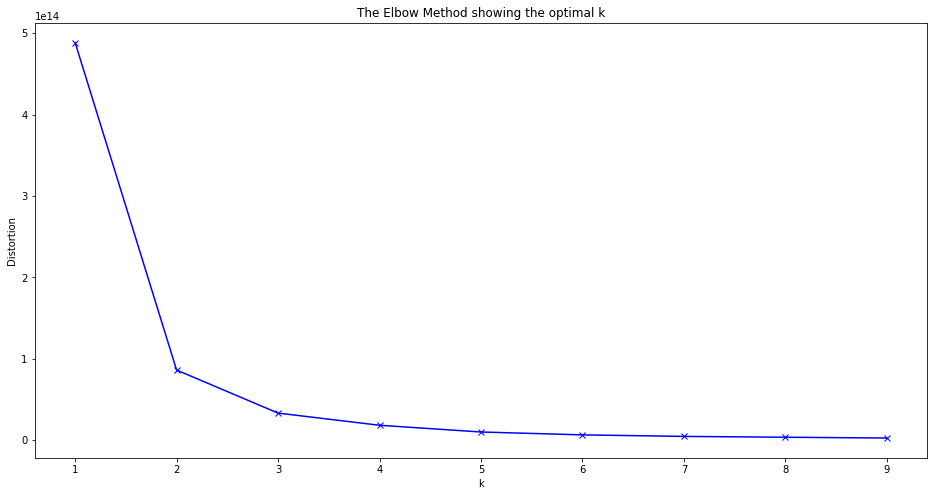

In [ ]:
# Running K means cluster
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_df)
    distortions.append(kmeanModel.inertia_)

# Plot PCA graph
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Final Clustering
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(pca_df)

print(pca_df.head(5))
# Plot clustering
pca_df['k_means']=kmeanModel.predict(pca_df)
plt.figure(figsize=(16,8))
plt.scatter(pca_df[0], c=pca_df['k_means'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of classes')
plt.show()

# Running Code for 110PZ dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/')

import cv2
from os import listdir
from PIL import Image as PImage
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


def loadImages(path,image_num):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    count=0
    for image in imagesList[0:min(len(imagesList),image_num)]:
      img = PImage.open(path +'/'+ image)
      if count == 0:
        print(img.size)
      img = img.resize((int(img.size[1]/factor), int(img.size[0]/factor)))
      #img.thumbnail(maxsize)
      img = np.array(img)
      if count == 0:
        print(img.shape)
      img = img.reshape(img.shape[0]*img.shape[1])
      loadedImages.append(img)
      count = count + 1

    return loadedImages


image_num = 100
factor = 2
path = "/content/drive/MyDrive/Pixxel_Work/110Kt_images/"

# your images in an array
imgs = loadImages(path, image_num)

# Test the output
sum=0
print(len(imgs[0]))
for i in range(len(imgs[0])):
  sum=sum+imgs[0][i]
print(sum)

# Create numpy array 
imgs_np = np.array(imgs)
print(imgs_np.shape)
print(imgs_np)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1061, 3521)
(530, 1760)
932800
316262
(100, 932800)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Perform PCA
from sklearn.decomposition import PCA
variance = 0.98
pca = PCA(variance)
pca.fit(imgs_np)
print("Number of components after PCA 0.98 = " + str(pca.n_components_))

# Transform dataframe as per PCA
pca_data = pca.transform(imgs_np)
print("Dimension of our data after PCA = " + str(pca_data.shape))

pca_df = pd.DataFrame(pca_data)
print(pca_df.shape)

Number of components after PCA 0.98 = 1
Dimension of our data after PCA = (100, 1)
(100, 1)


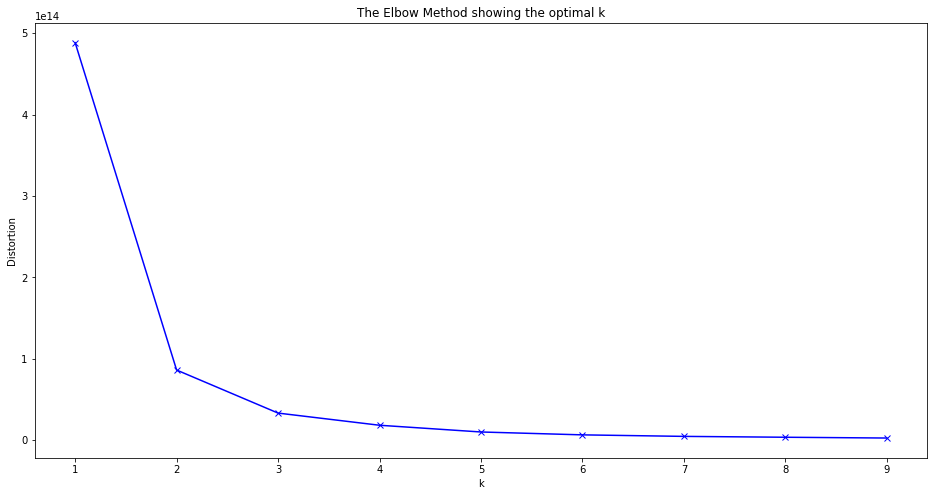

In [ ]:
# Running K means cluster
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca_df)
    distortions.append(kmeanModel.inertia_)

# Plot PCA graph
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Final Clustering
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(pca_df)

# Plot clustering
pca_df['k_means']=kmeanModel.predict(pca_df)
plt.figure(figsize=(16,8))
plt.scatter(pca_df[0], pca_df[1], c=pca_df['k_means'],cmap=plt.cm.Set1)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Distribution of classes')
plt.show()

In [ ]:
#df = pd.DataFrame(imgs_np)
#rdd = spark.sparkContext.parallelize(imgs_np)

In [ ]:
#spark_df = spark.createDataFrame(df)